In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Read the data into a DataFrame
short_df = pd.read_csv('5차년도_2차.csv', encoding='CP949') # Replace 'your_data.csv' with the actual file name
short_df = short_df[short_df['상황'] != 'sad']
short_df = short_df.reset_index()
encoder = LabelEncoder()
short_df['상황'] = encoder.fit_transform(short_df['상황'].values)
# Preprocess the text data
sentences = short_df['발화문'].values
labels = short_df['상황'].values


In [2]:
Counter(labels)
# happiness    4548
# angry        3263
# neutral      3253
# sadness      2848
# disgust      2321
# surprise     1755
# fear         1386

Counter({3: 4548, 4: 3253, 5: 2848, 0: 3263, 6: 1755, 1: 2321, 2: 1386})

In [5]:
sentences.shape

(19374,)

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

vocab_size = len(tokenizer.word_index) + 1
max_len = max([len(sentence.split()) for sentence in sentences])

sequences = tokenizer.texts_to_sequences(sentences)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Define the LSTM model
# Define the LSTM model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_len))
model.add(LSTM(128, return_sequences=True))  # Add the first LSTM layer
model.add(LSTM(64, return_sequences=True))   # Add the second LSTM layer
model.add(LSTM(32, return_sequences=True))   # Add the third LSTM layer
model.add(LSTM(16))                          # Add the fourth LSTM layer
model.add(Dense(64, activation='relu'))      # Add the first Dense layer
model.add(Dense(7, activation='softmax'))    # Add the second Dense layer


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 24, 100)           1218100   
                                                                 
 lstm (LSTM)                 (None, 24, 128)           117248    
                                                                 
 lstm_1 (LSTM)               (None, 24, 64)            49408     
                                                                 
 lstm_2 (LSTM)               (None, 24, 32)            12416     
                                                                 
 lstm_3 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 64)                1088      
                                                                 
 dense_1 (Dense)             (None, 7)                 4

In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/100
243/243 [==============================] - 61s 188ms/step - loss: 1.4112 - accuracy: 0.4344 - val_loss: 0.8467 - val_accuracy: 0.6939
Epoch 2/100
243/243 [==============================] - 43s 176ms/step - loss: 0.5749 - accuracy: 0.7996 - val_loss: 0.5558 - val_accuracy: 0.8217
Epoch 3/100
243/243 [==============================] - 43s 176ms/step - loss: 0.3099 - accuracy: 0.9008 - val_loss: 0.5026 - val_accuracy: 0.8379
Epoch 4/100
243/243 [==============================] - 39s 161ms/step - loss: 0.2147 - accuracy: 0.9339 - val_loss: 0.4852 - val_accuracy: 0.8529
Epoch 5/100
243/243 [==============================] - 40s 166ms/step - loss: 0.1652 - accuracy: 0.9495 - val_loss: 0.4633 - val_accuracy: 0.8519
Epoch 6/100
243/243 [==============================] - 45s 184ms/step - loss: 0.1296 - accuracy: 0.9615 - val_loss: 0.4995 - val_accuracy: 0.8537
Epoch 7/100
243/243 [==============================] - 41s 170ms/step - loss: 0.1186 - accuracy: 0.9634 - val_loss: 0.5116 -

  3/122 [..............................] - ETA: 3s - loss: 0.6574 - accuracy: 0.8958

122/122 [==============================] - 4s 30ms/step - loss: 0.8718 - accuracy: 0.8627
Test Loss: 0.8717594146728516
Test Accuracy: 0.8627097010612488


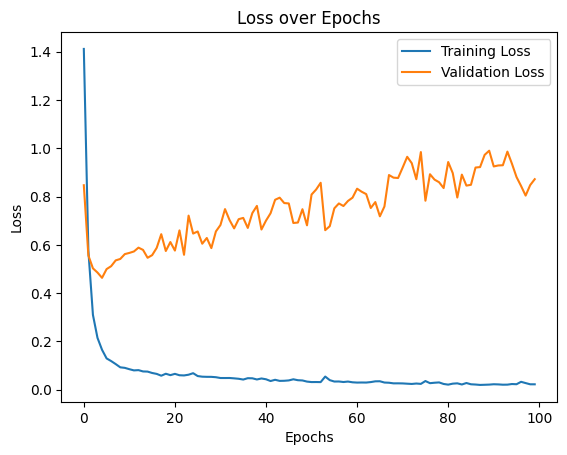

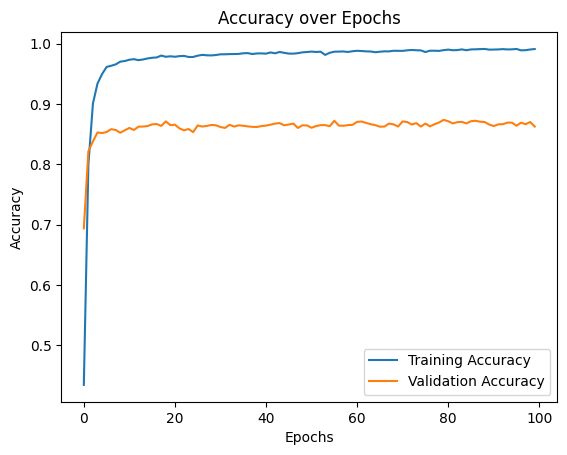

Test Loss: 0.8718
Test Accuracy: 0.8627


In [13]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Plot the loss history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Plot the accuracy history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


In [12]:
test_sentence = input("하고싶은 말을 하세요: ")
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])

test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=max_len)
prediction = model.predict(test_X_1)

result_emotion = {0:"중립", 1:"혐오", 2:"공포", 3:"행복", 4:"분노", 5:"슬픔",6:"놀람"}

for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])
    result = prediction[idx]
    res_ind = np.argmax(result)
    print("감정분석 결과:", result_emotion[res_ind])

1/1 [==============================] - 0s 107ms/step
['정말']
[9.4071075e-02 8.1906712e-01 1.1967924e-04 7.4640006e-02 2.3319177e-05
 1.1991859e-02 8.6819171e-05]
감정분석 결과: 혐오
['정말', '재미']
[7.9307485e-01 1.9851235e-01 1.2603302e-03 1.4030760e-03 7.0743106e-04
 4.3736142e-03 6.6833349e-04]
감정분석 결과: 중립
['정말', '재미', '있다']
[1.5748757e-01 2.0631699e-02 3.4881836e-05 2.9306368e-03 1.8910599e-05
 8.1887358e-01 2.2677919e-05]
감정분석 결과: 슬픔


In [14]:
from keras.models import load_model

model.save('model.h5')